In [1]:
from numba import jit
import numpy as np
import matplotlib.pyplot as plt
import scienceplots
plt.style.use(['science', 'grid', 'notebook'])

In [2]:
@jit(nopython=True)
def two_dim_ising(L : int, temp : float, num_steps : int):
    Lattice_matrix = np.ones((L, L), dtype=np.int32)

    # Energy definition
    E_arr = np.empty(num_steps + 1) # store energy at each step
    E_arr[0] = -2 * L**2 # initial energy

    # Spin definition
    S_arr = np.empty(num_steps + 1)
    S_arr[0] = L**2

    for step in range(num_steps):
        i = np.random.randint(L)
        j = np.random.randint(L)
        H = 0  # external magnetic field

        s_i = Lattice_matrix[i, j]
        s_top = Lattice_matrix[(i - 1) % L, j]
        s_bot = Lattice_matrix[(i + 1) % L, j]
        s_left = Lattice_matrix[i, (j - 1) % L]
        s_right = Lattice_matrix[i, (j + 1) % L]
        dE = 2 * s_i * (s_top + s_bot + s_left + s_right + H)

        # if we accept the change
        if dE <= 0 or np.random.rand() < np.exp(-dE/temp):
            Lattice_matrix[i, j] = -s_i
            E_arr[step+1] = E_arr[step] - dE # energy update
            S_arr[step+1] = S_arr[step] - 2*s_i # spin update     
        # if we dont accept the change
        else:
            E_arr[step+1] = E_arr[step] # energy update
            S_arr[step+1] = S_arr[step] # spin update
    
    return Lattice_matrix, E_arr, S_arr

def U(E_arr, num_steps, L):
    burn_in = num_steps // 10 # keep one percent as burn in
    E_eff = E_arr[burn_in:]
    return np.mean(E_eff)/(L**2)

def M(S_arr, num_steps, L):
    burn_in = num_steps // 10 # keep one percent as burn in
    S_eff = S_arr[burn_in:]
    return np.mean(S_eff)/L**2

In [3]:
T = np.linspace(0.1, 2.25, 100)
M_arr = np.empty(T.size)
for i in range(T.size):
    num_steps = int(1e7)
    L = 200
    arr, E, S = two_dim_ising(L = L, temp = T[i], num_steps = num_steps)
    # print(U(E_arr=E, num_steps=num_steps, L = L))
    M_arr[i] = M(S_arr=S, num_steps=num_steps, L = L)

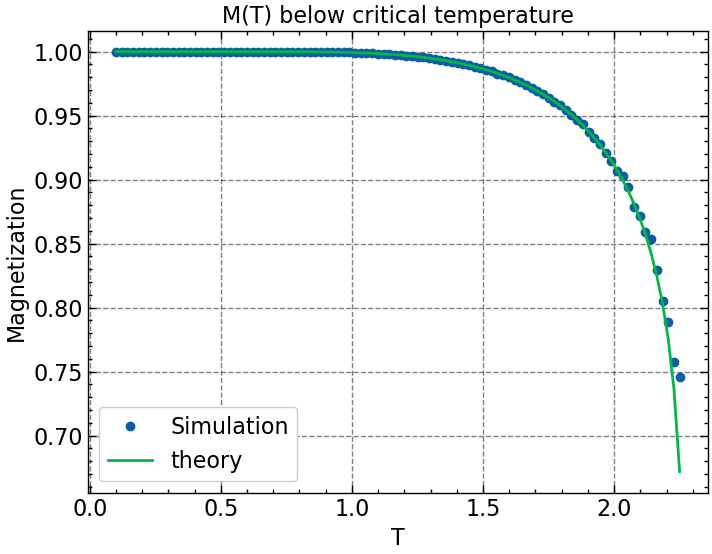

In [4]:
M_theory = (1-( np.sinh(2/T) )**-4 )**(1/8)
plt.plot(T, M_arr, 'o', label = 'Simulation')
plt.plot(T, M_theory, label = 'theory')
plt.xlabel('T')
plt.ylabel('Magnetization')
plt.title('M(T) below critical temperature')
plt.legend()
plt.show()

In [5]:
T = np.linspace(2.7, 10, 100)
M_arr = np.empty(T.size)
for i in range(T.size):
    num_steps = int(1e7)
    L = 200
    arr, E, S = two_dim_ising(L = L, temp = T[i], num_steps = num_steps)
    # print(U(E_arr=E, num_steps=num_steps, L = L))
    M_arr[i] = M(S_arr=S, num_steps=num_steps, L = L)

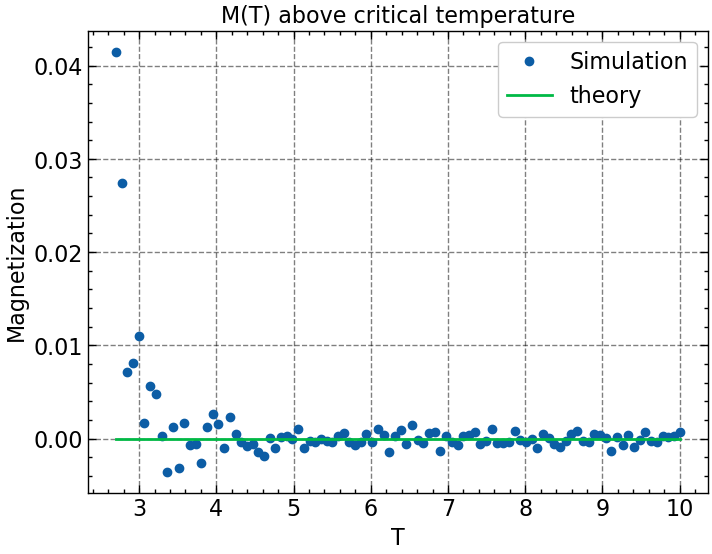

In [6]:
M_theory = np.zeros(T.size)
plt.plot(T, M_arr, 'o', label = 'Simulation')
plt.plot(T, M_theory, label = 'theory')
plt.xlabel('T')
plt.ylabel('Magnetization')
plt.title('M(T) above critical temperature')
plt.legend()
plt.show()